In [60]:
import matplotlib.pyplot as plt
import numpy as np
import analyzer
import Compare
import Read
import Maxima
import array
import re
import os
import sys
import pickle
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import importlib
import timeit
import struct
import Plot_generator
from timeit import default_timer as timer
importlib.reload(Compare)
importlib.reload(analyzer)
importlib.reload(Read)
importlib.reload(Maxima)
importlib.reload(Plot_generator)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"text.usetex": True, "font.size": 16})


### Minimum main

[0.013140938248300128, 0.016352643489544176, 0.016674779676223796, 0.016699784187230025, 0.028279072327191585, 0.028432985641663754, 0.8670743459121176, 0.009206098432690421, 0.016357027436691377, 0.02035473769127757, 0.020755706243731416, 0.020786830730363273, 0.03520074627936646, 0.035512888173013034, 0.9312402727238267, 0.01289014980266464, 0.016291989167381112, 0.02027380327577654, 0.020673177395251728, 0.02070417813335813, 0.035060747951092104, 0.03536937786118345, 0.9303248443632861, 0.012808820936700905, 0.016345879147246115, 0.02034086301744186, 0.02074155786280558, 0.020772661178753093, 0.035176710715723494, 0.035488198633557934, 0.9311158930482104, 0.01287610787365227, 0.7815466844162223, 0.8503780109415964, 0.8563314635119821, 0.8566754032104007, 0.9817279553935366, 0.9793943257348056, 0.057915376690785794, 0.9785052947192266, 0.7949261993127531, 0.8644237064218141, 0.8704085486546048, 0.8707642285597967, 0.9895458042441164, 0.9878920431183624, 0.05920765922729847, 0.9854949

()

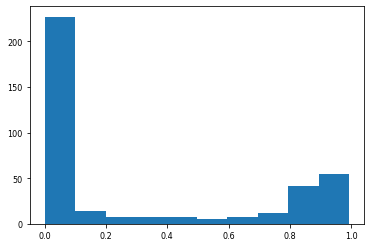

In [103]:
importlib.reload(Compare)
importlib.reload(analyzer)
importlib.reload(Read)
importlib.reload(Plot_generator)

#folder_in=str(sys.argv[1]) #./gf_afm_1p5t/ 
#tao_compare=str(sys.argv[2]) # 1.5
#folder_out=str(sys.argv[3]) #./compare_1p5t/gf_afm_1p5t/  

folder_in="../4x4x4x32/b2p44_new/gf_afm_2p0t/"
tao_compare=str(2)
folder_out="../4x4x4x32/b2p44_new/compare_2p0t/gf_afm_2p0t/"

sizes=[4,4,4,32]
max_modes=8
colors=3
spin_length=4

lambda_min=0.10
lambda_max=0.40
steps=4
lambdas=np.linspace(lambda_min,lambda_max,num=steps)
RPO_threshold=0.15

conf_start=10
conf_end=100
conf_step=10
conf=np.arange(conf_start,conf_end,conf_step)
folder_gf="../4x4x4x32/b2p44_new/gf/"

top_gauge,conf_read=analyzer.Count_index_gf(folder_gf,conf)

#Compare.GM_RPO_cut(folder_in,folder_out,sizes,max_modes,colors,spin_length,conf_read,lambdas,RPO_threshold,tao_compare)
#Compare.GM_doublers(folder_in,folder_out,sizes,max_modes,colors,spin_length,conf_read,lambdas,RPO_threshold,tao_compare)

Plot_generator.histogram(folder_out,"GM_doublers.txt")


In [104]:
importlib.reload(Compare)
importlib.reload(analyzer)
importlib.reload(Read)
importlib.reload(Plot_generator)

#main plot
folder_modes="../4x4x4x32/b2p44_new/"
tau_compare=str(2)
folder_out="../4x4x4x32/b2p44_new/compare_2p0t/"
RPO_threshold=0.17

#Plots about GM
observable="GM"
Plot_generator.MC_history(folder_out,folder_out,measures,lambdas,observable)
Plot_generator.Cut_dependence(folder_out,folder_out,measures,observable)

#Plot with the GF
folder_gf="../4x4x4x32/b2p44_new/gf/"
t_start=0
t_end=4
t_step=0.25
Plot_generator.GF_vs_AFM(folder_out, folder_gf, folder_out, conf_read, t_start, t_end, t_step,
                         RPO_threshold,tau_compare,measures,time_measures,observable)

#Susy_plots
measures=np.loadtxt(folder_out+"measures.txt", dtype=str)[0]
for measure in measures:
    f=open(folder_out+measure+"lambda_opt.txt",'r')
    lamba_string=f.read().split('\n')
    lambda_opt,index_opt=float(lamba_string[0]), int(float(lamba_string[1]))
    f.close()

    susy_read_s0=analyzer.Count_index(folder_modes+measure+"/sector_0/Measure.seq",
                                      ":OverlapFilterModeR:",lambda_opt,conf_read)
    susy_read_s1=analyzer.Count_index(folder_modes+measure+"/sector_1/Measure.seq",
                                      ":OverlapFilterModeR:",lambda_opt,conf_read)

    Plot_generator.susy_plot(folder_modes+measure,folder_out+measure,sizes,colors,
                             spin_length,max_modes,conf_read,susy_read_s0,susy_read_s1)


gf_afm_2p0t/
0
1
2
3
2


FileNotFoundError: ../4x4x4x32/b2p44_new/compare_2p0t/2./GM_hist_0.txt not found.

### GF

In [159]:
configurations=np.arange(10,1000,10)
folder="../4x4x4x32/b2p44_new/gf/"
count_top, conf_read=analyzer.Count_index_gf(folder,configurations)

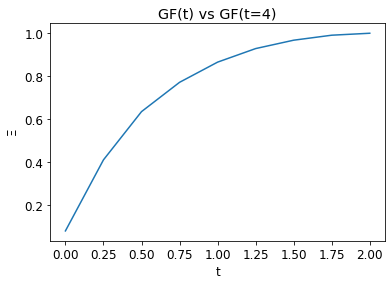

In [160]:
folder="../4x4x4x32/b2p44_new/"
measure="gf/"
observable="GM"
data=np.loadtxt(folder+measure+observable+".txt")
#ov_max, susy_max=np.loadtxt(folder+measure+"end_spectrum.txt")
plt.xlabel("t")
plt.ylabel(r'$\Xi$')
plt.rcParams.update({'font.size': 12})
plt.title('GF(t) vs GF(t=4)')
plt.plot(data[1],data[0], label="$t=4.0$")
plt.savefig(folder+"./GF.pdf")


### MC history and error bars

0.994774572320626


KeyboardInterrupt: 

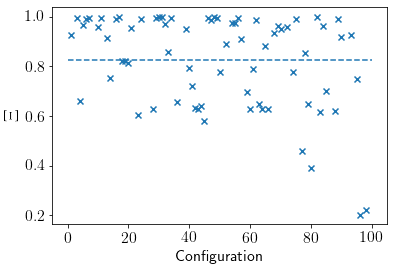

In [1185]:
plt.rcParams.update({"text.usetex": True, "font.size": 16})
# Read dictionary pkl file
folder_out="../4x4x4x32/b2p44_new/compare_4p0t/"
for measure in ("gf_afm_4p0t/", "gf_afm_3p0t/", "gf_afm_2p0t/","gf_afm_1p5t/", "gf_afm_1p125t/", "gf_afm_1p0t/","gf_afm_0p75t/", "gf_afm_0p5t/", "gf_afm_0p25t/","gf_afm_0p0t/"):
    for t in range(0,20):
        with open(folder_out+measure+"./GM_hist_"+str(t)+".txt", 'rb') as f:
            #print(folder_out+measure+"./GM_hist_"+str(t)+".txt")
            GM = pickle.load(f)
        x=[]
        GM_mc=[]
        GM_mean=0
        variance=0
        for key in GM:
            GM_mean+=float(GM[key])
            x.append(int(key)/10)
        GM_mean/=len(GM)
        for key in GM:
            GM_mc.append(GM[key])
            variance+=(GM[key]-GM_mean)**2
        error=np.sqrt(variance)/len(GM)
        with open(folder_out+measure+"./GM_error_opt_"+str(t)+".txt", 'w') as f:
            #print(folder_out+measure+"./GM_error_opt.txt")
            f.write(str(error))
        plt.scatter(x,GM_mc, marker="x")
        plt.hlines(GM_mean, xmin=0, xmax=100, linestyle="--")
        plt.xlabel(r'Configuration')
        plt.ylabel(r'$$ \mbox{\huge $ \Xi$}$$')
        plt.xticks(np.arange(0, 120,  step=20))
        plt.savefig(folder_out+measure+"GM_history_"+str(t)+".pdf",dpi=150, bbox_inches='tight')
        f=open(folder+measure+"lambda_opt.txt",'r')
        lamba_string=f.read().split('\n')
        lambda_opt,index_opt=float(lamba_string[0]), int(float(lamba_string[1]))
        f.close()
        if index_opt==t:
            plt.savefig(folder_out+measure+"GM_history_opt.pdf",dpi=150, bbox_inches='tight')
            print(GM_mean)
        plt.close()

### Merging plots

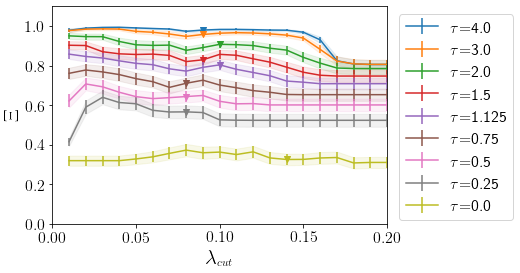

In [881]:
observable="GM"
folder="../4x4x4x32/b2p44_new/compare_4p0t/"
plt.rcParams.update({'font.size': 16})
ax = plt.gca()
for measure in ("gf_afm_4p0t/", "gf_afm_3p0t/", "gf_afm_2p0t/", "gf_afm_1p5t/", 
                "gf_afm_1p125t/", "gf_afm_0p75t/", "gf_afm_0p5t/", "gf_afm_0p25t/","gf_afm_0p0t/"):
    
    time=re.sub("gf_afm", "", measure)
    time=re.sub("t","", time)
    time=re.sub("p",".", time)
    time=re.sub("/","", time)
    time=re.sub("_","", time)
    data=np.loadtxt(folder+measure+observable+".txt")
    susy_max=np.loadtxt(folder+measure+"end_spectrum.txt")
    
    error=[]
    for t in range(0,len(data[0])):
        with open(folder_out+measure+"./GM_error_opt_"+str(t)+".txt", 'r') as f:
            error.append(float(f.readline()))
        f.close()
        
    color = next(ax._get_lines.prop_cycler)['color']
    plt.errorbar(data[1],data[0], yerr=error, label=r'$\tau$'+"="+time, color=color)
    plt.fill_between(data[1], data[0]-error, data[0]+error, alpha=0.1, color=color)
    plt.scatter(susy_max[0],data[0,int(susy_max[1])], marker="v", color=color)

plt.xlabel(r'$$ \mbox{\huge $\lambda$}_{cut} $$')
plt.ylabel(r'$$ \mbox{\huge $ \Xi$}$$')
#plt.legend(loc="upper right", ncol=1)
plt.ylim([0,1.1])
plt.xlim([0.0,0.20])

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1, box.height])

# Put a legend to the right of the current axis
ax.legend(loc="upper right", ncol=1, bbox_to_anchor=(1.40, 1))

plt.savefig(folder+observable+"_4t.pdf",dpi=150, bbox_inches='tight')


### Xi max and GF

In [1027]:
def Xi_max(data,susy_max):
    maximum=0
    for i in range(0,len(data[0])):
            if (data[0,i] > maximum) and (data[1,i]<susy_max[0]):
                maximum=data[0,i]
    return(maximum)

In [1028]:
def find_max(folder,measure,observable):
    data=np.loadtxt(folder+measure+observable+".txt")
    if measure=="gf_afm_0p0t/":
        susy_max=np.loadtxt(folder+measure+"end_spectrum.txt")
    else:
        susy_max=np.loadtxt(folder+measure+"end_spectrum.txt")
    maximum=Xi_max(data,susy_max)
    return(maximum)

In [1026]:
importlib.reload(Compare)
importlib.reload(analyzer)
folder_in="../4x4x4x32/b2p44_new/gf/"
folder_out="../4x4x4x32/b2p44_new/compare_4p0t/"
#folder="../4x4x4x32/b2p44_new/gf/"
conf_start=10
conf_end=1000
conf_step=10
configurations=np.arange(conf_start,conf_end,conf_step)
t_start=0
t_end=4
t_step=0.25
RPO_trehsold=0.175
tau_compare=4

GM_GF=Compare.GF_vs_GF(folder_in, folder_out, configurations, t_start, t_end, t_step,RPO_trehsold,tau_compare)

In [1214]:
print(measure)

gf_afm_0p0t/


[0.99477457 0.98654417 0.         0.90375596 0.85876687 0.7785188
 0.70801853 0.64034103 0.37320505]
../4x4x4x32/b2p44_new/compare_4p0t/
GM


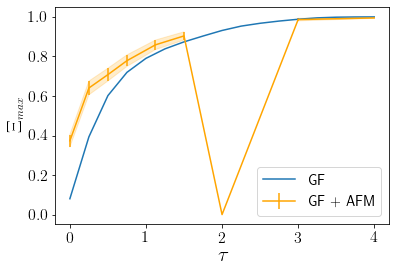

In [1226]:
plt.rcParams.update({'font.size': 16})
ax = plt.gca()
observable="GM"
folder="../4x4x4x32/b2p44_new/compare_4p0t/"
maximum=np.zeros((9))
error=np.zeros((9))
t=0
for measure in ("gf_afm_4p0t/", "gf_afm_3p0t/", "gf_afm_2p0t/", "gf_afm_1p5t/", "gf_afm_1p125t/", "gf_afm_0p75t/","gf_afm_0p5t/", "gf_afm_0p25t/","gf_afm_0p0t/"):
    data=np.loadtxt(folder+measure+observable+".txt")
    
    f=open(folder+measure+"lambda_opt.txt",'r')
    lamba_string=f.read().split('\n')
    lambda_opt,index_opt=float(lamba_string[0]), int(float(lamba_string[1]))
    f.close()
    f=open(folder+measure+"GM_error_opt_"+str(index_opt)+".txt",'r')
    error[t]=float(f.read())
    f.close()
    
    maximum[t]=find_max(folder,measure,observable)
    t+=1
print(maximum)
t=[4,3,2,1.5,1.125,0.75,0.5,0.25,0]

observable="GM"
data=np.loadtxt(folder+observable+".txt")
print(folder)
print(observable)
plt.xlabel(r'$$ \mbox{\huge $\tau$} $$')
plt.ylabel(r'$$ \mbox{\huge $ \Xi$}_{max}$$')

plt.rcParams.update({'font.size': 16})
#plt.title('(GF + AFM) vs GF')
plt.plot(data[1],data[0], label=r'{\Large GF}')
plt.errorbar(t,maximum, yerr=error, color="orange", label=r'{\Large GF + AFM}')
plt.fill_between(t, maximum-error, maximum+error,color="orange",alpha=0.2)
plt.legend(loc="lower right")
plt.savefig(folder+"./GF_AFM_4p0t.pdf",dpi=150, bbox_inches='tight')

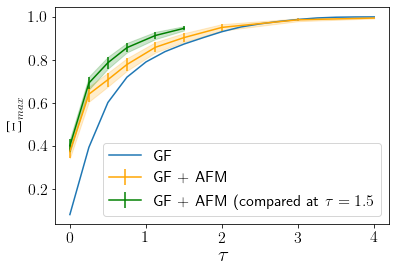

In [1048]:
observable="GM"
folder="../4x4x4x32/b2p44_new/compare_4p0t/"
maximum=np.zeros((9))
error=np.zeros((9))
t=0
for measure in ("gf_afm_4p0t/", "gf_afm_3p0t/", "gf_afm_2p0t/", "gf_afm_1p5t/", "gf_afm_1p125t/", "gf_afm_0p75t/","gf_afm_0p5t/", "gf_afm_0p25t/","gf_afm_0p0t/"):
    data=np.loadtxt(folder+measure+observable+".txt")
    
    f=open(folder+measure+"lambda_opt.txt",'r')
    lamba_string=f.read().split('\n')
    lambda_opt,index_opt=float(lamba_string[0]), int(float(lamba_string[1]))
    f.close()
    f=open(folder+measure+"GM_error_opt_"+str(index_opt)+".txt",'r')
    error[t]=float(f.read())
    f.close()
    
    maximum[t]=find_max(folder,measure,observable)
    t+=1
t=[4,3,2,1.5,1.125,0.75,0.5,0.25,0]

observable="GM"
data=np.loadtxt(folder+observable+".txt")
plt.xlabel("t")
plt.ylabel(r'$\Xi$')
plt.rcParams.update({'font.size': 12})
#plt.title('(GF + AFM) vs GF')
plt.plot(data[1],data[0], label="GF")
plt.errorbar(t,maximum, yerr=error, color="orange", label="GF + AFM")
plt.fill_between(t, maximum-error, maximum+error,color="orange",alpha=0.2)
plt.legend(loc="lower right")

observable="GM"
folder="../4x4x4x32/b2p44_new/compare_1p5t/"
maximum=np.zeros((6))
error=np.zeros((6))
t=0
for measure in ("gf_afm_1p5t/", "gf_afm_1p125t/", "gf_afm_0p75t/","gf_afm_0p5t/", "gf_afm_0p25t/","gf_afm_0p0t/"):
    data=np.loadtxt(folder+measure+observable+".txt")
    
    f=open(folder+measure+"lambda_opt.txt",'r')
    lamba_string=f.read().split('\n')
    lambda_opt,index_opt=float(lamba_string[0]), int(float(lamba_string[1]))
    f.close()
    f=open(folder+measure+"GM_error_opt_"+str(index_opt)+".txt",'r')
    error[t]=float(f.read())
    f.close()
    
    maximum[t]=find_max(folder,measure,observable)
    t+=1
t=[1.5,1.125,0.75,0.5,0.25,0]

observable="GM"
#data=np.loadtxt(folder+observable+".txt")

plt.xlabel(r'$$ \mbox{\huge $\tau$} $$')
plt.ylabel(r'$$ \mbox{\huge $ \Xi$}_{max}$$')

plt.rcParams.update({'font.size': 16})
#plt.title('(GF + AFM) vs GF')
#plt.plot(data[1],data[0], label="GF")
plt.errorbar(t,maximum, yerr=error, color="green", label=r'GF + AFM (compared at $\tau=1.5$')
plt.fill_between(t, maximum-error, maximum+error,color="green",alpha=0.2)
plt.legend(loc="lower right")
plt.savefig(folder+"./GF_AFM_1p5t.pdf",dpi=150, bbox_inches='tight')

### Example Configurations

In [22]:
measure="gf_afm_0p5t/"
folder_out='../4x4x4x32/b2p44_new/compare_4p0t/'
f=open(folder_out+measure+"lambda_opt.txt",'r')
lamba_string=f.read().split('\n')
lambda_opt,index_opt=float(lamba_string[0]), int(float(lamba_string[1]))
f.close()
GM=np.loadtxt(folder_out+measure+"GM_history_opt.txt")
for element in GM:
    if element[1]>0.4 and element[1]<0.6:
        print(element)
        conf=int(element[0])

[60.          0.54488515]
[130.           0.55497646]
[170.          0.5442714]
[190.           0.44509113]
[280.           0.43322543]
[320.           0.57699347]
[330.           0.53578214]
[360.           0.42232722]
[390.           0.57247488]
[420.         0.438637]
[4.50000000e+02 4.41644908e-01]
[460.           0.49016301]
[5.00000000e+02 4.43701728e-01]
[550.           0.55153745]
[6.60000000e+02 4.35085254e-01]
[6.90000000e+02 5.58291783e-01]
[7.40000000e+02 4.41302806e-01]
[8.00000000e+02 4.26632356e-01]
[8.20000000e+02 5.17153966e-01]
[8.30000000e+02 4.34730714e-01]
[8.40000000e+02 5.48644987e-01]
[8.9000000e+02 5.4485246e-01]
[9.30000000e+02 5.56115005e-01]


In [23]:
measure="gf_afm_0p5t/"
folder_out='../4x4x4x32/b2p44_new/compare_4p0t/'
f=open(folder_out+measure+"lambda_opt.txt",'r')
lamba_string=f.read().split('\n')
lambda_opt,index_opt=float(lamba_string[0]), int(float(lamba_string[1]))
f.close()
GM=np.loadtxt(folder_out+measure+"GM_history_opt.txt")
for element in GM:
    if element[1]<0.2:
        print(element)
        conf=int(element[0])

[1.60000000e+02 1.07119463e-01]
[4.70000000e+02 5.79291356e-02]
[5.40000000e+02 2.00352035e-02]
[9.60000000e+02 1.33247841e-01]


In [49]:
folder_out='../4x4x4x32/b2p44_new/compare_4p0t/'
folder="../4x4x4x32/b2p44_new/compare_4p0t/"
measure="gf_afm_0p5t/"
#ax = plt.gca()
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,6))
index=0

f=open(folder_out+measure+"lambda_opt.txt",'r')
lamba_string=f.read().split('\n')
lambda_opt,index_opt=float(lamba_string[0]), int(float(lamba_string[1]))
f.close()

conf_read=[750,830,890,980]
GM=np.loadtxt(folder_out+measure+"GM_history_opt.txt")
        
for conf in conf_read:
    #Read GF
    Topology_1=folder+"../gf/profile4dt0.5c"+str(conf)+"to.dat"
    Topology_2=folder+"../gf/profile4dt2c"+str(conf)+"to.dat"
    Topology_3=folder+"../gf/profile4dt4c"+str(conf)+"to.dat"
    density_top_1,sizes=Read.topology_1d(Topology_1)
    density_top_2,sizes=Read.topology_1d(Topology_2)
    density_top_3,sizes=Read.topology_1d(Topology_3)
    
    normalization=np.sum(np.abs(density_top_3))

    #Construct susy mode
    density_susy=np.loadtxt(folder+measure+"susy_mode_"+str(conf)+"c.txt")
    density_susy=density_susy*(normalization/np.sum(np.abs(density_susy)))

    i=index%2
    j=int(index/2)%2
    #Plot the three densities
    axes[i,j].plot(density_top_1,label=r'Top. density $\tau=0.5$')
    axes[i,j].plot(density_top_2, label=r'Top. density $\tau=2$')
    axes[i,j].plot(density_top_3, label=r'Top. density $\tau=4$')
    axes[i,j].plot(density_susy, label=r'SZM density $\tau=0.5$')
    
    if j==0:
        axes[i,j].set_ylabel(r'q(t)')
    if i==0:
        axes[i,j].set_xlabel(r't')
    
    index+=1
    
box = axes[0,0].get_position()
axes[0,0].set_position([box.x0, box.y0, box.width * 1, box.height])

# Put a legend to the right of the current axis
axes[0,0].legend(loc="center", ncol=2, bbox_to_anchor=(1.10, 1.25))

fig.savefig(folder_out+"MC_densities.pdf",dpi=150, bbox_inches='tight')

plt.close()




In [48]:
folder_out='../4x4x4x32/b2p44_new/compare_4p0t/'
polyakov_file="../4x4x4x32/b2p44_new/Polyakov_loops/0p5t/Measure.seq_pol"
measure="gf_afm_0p5t/"
#ax = plt.gca()
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,6))
index=0
conf_read=[750,830,890,980]
        
for conf in conf_read:
    polyakov=[]
    #Read the polyakov
    with open(polyakov_file) as f:
        for line in f:
            splitted=line.split(":")
            #print(splitted)
            if splitted[1]==str(conf):
                element=splitted[5].split(",")
                polyakov.append(float(element[0].replace("(", "")))
    i=index%2
    j=int(index/2)%2
    #Plot the polyakov loop
    axes[i,j].plot(polyakov, label=r' $\tau=0.5$')
    
    if j==0:
        axes[i,j].set_ylabel(r'$<P_xP_yP_z>$')
    if i==1:
        axes[i,j].set_xlabel(r't')
    
    axes[i,j].set_ylim([-1,1])
    
    index+=1
    
#box = axes[0,0].get_position()
#axes[0,0].set_position([box.x0, box.y0, box.width * 1, box.height])

# Put a legend to the right of the current axis
#axes[0,0].legend(loc="center", ncol=2, bbox_to_anchor=(1.10, 1.25))

fig.savefig(folder_out+"Polyakov.pdf",dpi=150, bbox_inches='tight')

plt.close()


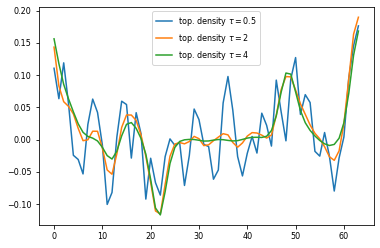

In [28]:
folder="../8x8x8x64_su2/b2p60/"
#measure="gf/"
conf=2300
#Read GF
Topology_1=folder+"./gf/profile4dt0.5c"+str(conf)+"to.dat"
Topology_2=folder+"./gf/profile4dt2c"+str(conf)+"to.dat"
Topology_3=folder+"./gf/profile4dt4c"+str(conf)+"to.dat"
density_top_1,sizes=Read.topology_1d(Topology_1)
density_top_2,sizes=Read.topology_1d(Topology_2)
density_top_3,sizes=Read.topology_1d(Topology_3)

normalization=np.sum(np.abs(density_top_3))

#Construct susy mode
#density_susy=np.loadtxt(folder+measure+"susy_mode_"+str(conf)+"c.txt")
#density_susy=density_susy*(normalization/np.sum(np.abs(density_susy)))
#Plot the three densities
plt.plot(density_top_1, label=r'top. density $\tau=0.5$')
plt.plot(density_top_2, label=r'top. density $\tau=2$')
plt.plot(density_top_3, label=r'top. density $\tau=4$')
#plt.plot(density_susy, label=r'AFM at $\tau=0.5$')
plt.legend(loc="upper center", ncol=1)
plt.savefig(folder+"gf/gf_"+str(conf)+"c.png",dpi=150, bbox_inches='tight')
#plt.close()

### Checking plaquettes

In [98]:
sizes=[4,4,4,32]
temp_file="../4x4x4x32/b2p44_new/check_plaquettes/Plaquettes.dat"
plaquettes = array.array('d')
with open(temp_file, 'rb') as file:
    for i in range(0,10):
        data=int.from_bytes(file.read(4),byteorder='little')
        print(data)
    n=sizes[0]*sizes[1]*sizes[2]*sizes[3]*6
    plaquettes.fromfile(file,n)
 

1
1
1
0
0
0
4
4
4
32


In [128]:
4*4*4*6

384

In [127]:
count=0
for element in plaquettes:
        if element<-0.1:
            print(element)
            print(count)
        count+=1

-0.99954733524963
90
-0.9996158625273368
186
-0.9999575566316357
282
-0.9996162131142488
307
-0.9999406289016783
331
-0.9999354566520684
355
-0.9995863764662462
362
-0.9992604228842776
368
-0.9992044133074459
374
-0.9999032149855249
378
-0.9996099562902646
379
-0.9995444483417268
380
-0.9969079022083297
474
-0.997420282664114
570
-0.99974153222639
666
-0.9978022685568946
691
-0.9996866279410939
715
-0.9996550013152102
739
-0.9976805987214545
746
-0.9949646773017199
752
-0.9944511602066107
758
-0.9993997669260166
762
-0.9977586731254178
763
-0.9973593522432983
764
-0.9877818112535338
858
-0.9900019559348909
954
-0.9991014684018116
1050
-0.9925514925620895
1075
-0.999035696871635
1099
-0.9989199944007032
1123
-0.9923426622394298
1130
-0.9798086326885124
1136
-0.9772006509084741
1142
-0.9978761340885822
1146
-0.9923687334472016
1147
-0.9909907142398546
1148
-0.9872483229847763
1242
-0.9895580688866774
1338
-0.9990611893601484
1434
-0.9923111846768687
1459
-0.9990258630639297
1483
-0.99886